In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

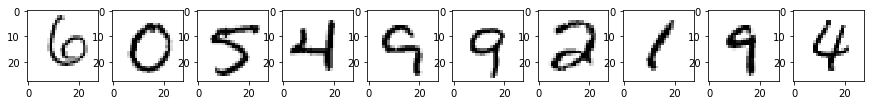

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf
import tensorlayer as tl

In [7]:
# Set parameters
training_iteration = 10
batch_size = 500
display_step = 2

FLAGS = None

In [8]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None,10]) # 0-9 digits recognition => 10 classes

In [9]:
network = tl.layers.InputLayer(x, name='input_layer')
network = tl.layers.DenseLayer(network, n_units=10,act = tf.nn.softmax, name='output_layer')

y_hat = network.outputs

  [TL] InputLayer  input_layer: (?, 784)
  [TL] DenseLayer  output_layer: 10 softmax


In [10]:
with tf.name_scope("cost_function") as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=y))
    tf.summary.scalar("cost_function", cost)

In [11]:
train_params = network.all_params
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer()
    learn     = optimizer.minimize(cost, var_list=train_params)

In [12]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.summary.merge_all()

In [13]:
# Launch the graph
sess = tf.InteractiveSession()

# Logs and graph for tensorboard
summary_writer = tf.summary.FileWriter('./tensorboard/tl', graph=sess.graph)

sess.run(init)

In [14]:
# Test the model, Calculate accuracy
prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [15]:
# train the network
tl.utils.fit(sess, network, learn, cost, mnist.train.images, mnist.train.labels, x, y,
             acc=acc, batch_size=500, n_epoch=10, print_freq=1, 
             X_val=mnist.test.images, y_val=mnist.test.labels, eval_train=False)


Start training the network ...
Epoch 1 of 10 took 0.255398s
   val loss: 1.760382
   val acc: 0.814800
Epoch 2 of 10 took 0.234566s
   val loss: 1.659706
   val acc: 0.871000
Epoch 3 of 10 took 0.232309s
   val loss: 1.624177
   val acc: 0.890400
Epoch 4 of 10 took 0.232735s
   val loss: 1.606006
   val acc: 0.899500
Epoch 5 of 10 took 0.230277s
   val loss: 1.594066
   val acc: 0.904700
Epoch 6 of 10 took 0.232189s
   val loss: 1.585544
   val acc: 0.908300
Epoch 7 of 10 took 0.232217s
   val loss: 1.579591
   val acc: 0.910300
Epoch 8 of 10 took 0.232132s
   val loss: 1.574692
   val acc: 0.911700
Epoch 9 of 10 took 0.233179s
   val loss: 1.570638
   val acc: 0.913800
Epoch 10 of 10 took 0.232514s
   val loss: 1.567255
   val acc: 0.915800
Total training time: 2.626965s


In [16]:
# evaluation
tl.utils.test(sess, network, acc, mnist.test.images, mnist.test.labels, x, y, batch_size=None)

Start testing the network ...
   test acc: 0.915800


In [17]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

result = sess.run(y_hat, feed_dict={x:[pixels]})
dict(zip(range(10), result[0]))

{0: 0.0002838799,
 1: 2.0632886e-05,
 2: 0.0062525244,
 3: 5.8651021e-05,
 4: 0.00042876235,
 5: 7.0531462e-07,
 6: 0.99214077,
 7: 3.4034816e-05,
 8: 0.00065167487,
 9: 0.00012842476}

In [18]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.49

    plt.barh(ind,result, width, color='orange', edgecolor='k', hatch="/")
    plt.barh(ind+width,truth,width, color='g', edgecolor='k')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

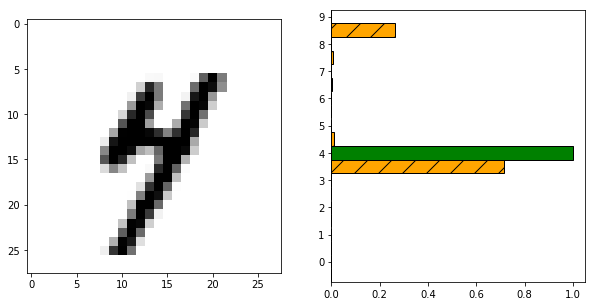

In [19]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = sess.run(y_hat, feed_dict={x:[pixels]})[0]

test_render(pixels, result, truth)

In [20]:
# Close the Session when we're done.
# sess.close()